## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
from keras.regularizers import l1,l2,l1_l2
def build_mlp(input_shape, output_units = 10, num_neurons = [512,256,128], l1_ = False, l1_ratio = 0, l2_ = False, l2_ratio = 0, 
              l1_l2_ = False, l1_l2_ratio = 0):
    """Code Here
    建立你的神經網路
    """
    if l1_:
        input_layer = keras.layers.Input(input_shape)
        for i, n_units in enumerate (num_neurons):
            if i ==0:
                x = keras.layers.Dense(units = n_units,
                                       activation = 'relu',
                                       name = "hidden_layer" + str(i+1),
                                       kernel_regularizer = l1(l1_ratio))(input_layer)
            else:
                x = keras.layers.Dense(units = n_units,
                                       activation = 'relu',
                                       name = "hidden_layer" + str(i+1),
                                       kernel_regularizer = l1(l1_ratio))(x)
        output = keras.layers.Dense(units = output_units,
                                    activation = 'softmax',
                                    name = 'output')(x)
        model = keras.models.Model(inputs=[input_layer], outputs=[output])
    elif l2_:
        input_layer = keras.layers.Input(input_shape)
        for i, n_units in enumerate (num_neurons):
            if i ==0:
                x = keras.layers.Dense(units = n_units,
                                       activation = 'relu',
                                       name = "hidden_layer" + str(i+1),
                                       kernel_regularizer = l2(l2_ratio))(input_layer)
            else:
                x = keras.layers.Dense(units = n_units,
                                       activation = 'relu',
                                       name = "hidden_layer" + str(i+1),
                                       kernel_regularizer = l2(l2_ratio))(x)
        output = keras.layers.Dense(units = output_units,
                                    activation = 'softmax',
                                    name = 'output')(x)
        model = keras.models.Model(inputs=[input_layer], outputs=[output])
    else:
        input_layer = keras.layers.Input(input_shape)
        for i, n_units in enumerate (num_neurons):
            if i ==0:
                x = keras.layers.Dense(units = n_units,
                                       activation = 'relu',
                                       name = "hidden_layer" + str(i+1),
                                       kernel_regularizer = l1_l2(l1_l2_ratio))(input_layer)
            else:
                x = keras.layers.Dense(units = n_units,
                                       activation = 'relu',
                                       name = "hidden_layer" + str(i+1),
                                       kernel_regularizer = l1_l2(l1_l2_ratio))(x)
        output = keras.layers.Dense(units = output_units,
                                    activation = 'softmax',
                                    name = 'output')(x)
        model = keras.models.Model(inputs=[input_layer], outputs=[output])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-6]
L2_EXP = [1e-2, 1e-4, 1e-6]
L1_L2_EXP = [1e-2, 1e-4, 1e-6]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regularizer_ratio in L1_EXP:
    keras.backend.clear_session()
    print("Experiment with Regularizer = %.6f" % (regularizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:],l1_ = True, l1_ratio=regularizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics= ['accuracy'])
    model.fit(x_train,y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data = (x_test,y_test),
             shuffle = True)
    # Collect Results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = 'exp-l1-%s'% str(regularizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with Regularizer = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 19ms/step - loss: 301

In [10]:
for regularizer_ratio in L2_EXP:
    keras.backend.clear_session()
    print("Experiment with Regularizer = %.6f" % (regularizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:],l2_ = True, l2_ratio=regularizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics= ['accuracy'])
    model.fit(x_train,y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data = (x_test,y_test),
             shuffle = True)
    # Collect Results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = 'exp-l2-%s'% str(regularizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regularizer = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 15.

In [16]:
for regularizer_ratio in L1_L2_EXP:
    keras.backend.clear_session()
    print("Experiment with Regularizer = %.6f" % (regularizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:],l1_l2_ = True, l1_l2_ratio=regularizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics= ['accuracy'])
    model.fit(x_train,y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data = (x_test,y_test),
             shuffle = True)
    # Collect Results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = 'exp-l1-l2-%s'% str(regularizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regularizer = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 5s 24ms/step - loss: 306

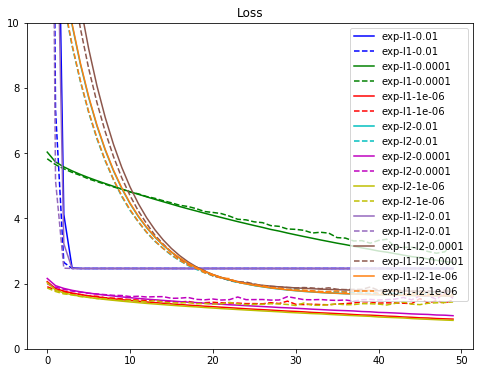

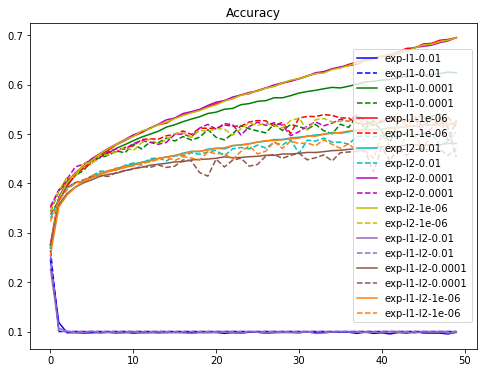

In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['b','g','r','c','m','y','tab:purple','tab:brown','tab:orange']

plt.figure(figsize=(8,6))
for i, cond in enumerate (results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'],'-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'],'--', label = cond, color = color_bar[i])
plt.title('Loss')
plt.legend()
plt.ylim([0,10])
plt.show()

plt.figure(figsize =(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()